In [3]:
#import necessary module required to do task
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#getting all file in folder1
filelist = glob.glob('Folder1/*.jpg')
#printing to see files name
filelist

['Folder1/126-TP2036.jpg',
 'Folder1/126-TP1351.jpg',
 'Folder1/126-LR10906.jpg',
 'Folder1/126-TP2045.jpg',
 'Folder1/126-LR10722.jpg']

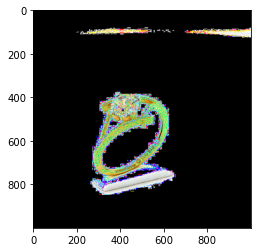

In [4]:
#Looping over the files list and Change all the white pixels to black pixels
for file in filelist:
    img = Image.open(file)
    img.load()
    data = np.asarray(img, dtype=np.uint8)
    #change white pixel to black
    data[data==255] = 0
    plt.imshow(data) 
    im = Image.fromarray(data)
    #again saving the changed image
    im.save("/home/daffolap-1025/Downloads/Task Images/foldersoutput/"+file)


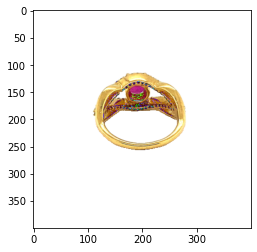

In [77]:
#getting all file in folder2
filelist1 = sorted(glob.glob('Folder2/*.png'))
#getting all file in folder3
filelist2 = sorted(glob.glob('Folder3/*.jpg'))
    

In [78]:
#initialize ans variable for h stack and v stack
ans = []

#looping over the files list
for file1,file2 in zip(filelist1,filelist2):
    #preparing the mask
    img = Image.open(file1).resize(size=(400, 400))
    img.load()
    mask = np.asarray(img, dtype=np.uint8)
    #changing into 1d
    gray = mask[:,:,0]
    gray[gray>0] = 255
    image = np.asarray(img2, dtype=np.uint8)
    res_mask = np.ma.masked_equal(gray, 255)
    res = np.ma.getmask(res_mask)
    

    
    img2 = Image.open(file2).resize(mask.shape[1::-1])
    img2.load()
    
    #changing into 3d mask
    field3d_mask = np.zeros(image.shape, dtype=bool)
    field3d_mask[:,:,:] = res[:,:,np.newaxis]
    
    #apply the mask on image which is in folder3
    image = np.where(field3d_mask,image,0)
    
    #changing into background white after applying a mask
    image[image==0] = 255
    plt.imshow(image)
    
    
    #saving the result image
    im = Image.fromarray(image)
    im.save("/home/daffolap-1025/Downloads/Task Images/foldersoutput/d.png")
    
    im = Image.fromarray(image)
    im.save("/home/daffolap-1025/Downloads/Task Images/foldersoutput/"+file1)
    
    # Add black border before stacking the images
    image=np.pad(image, ((2,2), (2,2), (0, 0)), 'constant')
    ans.append(image)
    


In [ ]:
hs = ans[0]
#apply hstack
for i in range(1,len(ans)):
    hs = np.hstack((hs,ans[i]))

#saving the image
im = Image.fromarray(hs)
im.save("/home/daffolap-1025/Downloads/Task Images/foldersoutput/d.png")

    